In [ ]:
import nltk
from nltk.corpus import brown

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, Bidirectional
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
nltk.download('brown')
nltk.download('universal_tagset')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [ ]:
corpus = brown.tagged_sents(tagset='universal')

In [ ]:
corpus

[[('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'ADJ'), ('Jury', 'NOUN'), ('said', 'VERB'), ('Friday', 'NOUN'), ('an', 'DET'), ('investigation', 'NOUN'), ('of', 'ADP'), ("Atlanta's", 'NOUN'), ('recent', 'ADJ'), ('primary', 'NOUN'), ('election', 'NOUN'), ('produced', 'VERB'), ('``', '.'), ('no', 'DET'), ('evidence', 'NOUN'), ("''", '.'), ('that', 'ADP'), ('any', 'DET'), ('irregularities', 'NOUN'), ('took', 'VERB'), ('place', 'NOUN'), ('.', '.')], [('The', 'DET'), ('jury', 'NOUN'), ('further', 'ADV'), ('said', 'VERB'), ('in', 'ADP'), ('term-end', 'NOUN'), ('presentments', 'NOUN'), ('that', 'ADP'), ('the', 'DET'), ('City', 'NOUN'), ('Executive', 'ADJ'), ('Committee', 'NOUN'), (',', '.'), ('which', 'DET'), ('had', 'VERB'), ('over-all', 'ADJ'), ('charge', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('election', 'NOUN'), (',', '.'), ('``', '.'), ('deserves', 'VERB'), ('the', 'DET'), ('praise', 'NOUN'), ('and', 'CONJ'), ('thanks', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('City

In [ ]:

len(corpus)

57340

In [ ]:
inputs = []
targets = []

for sentence_tag_pairs in corpus:
  tokens = []
  target = []
  # print(sentence_tag_pairs)
  for token, tag in sentence_tag_pairs:
    tokens.append(token)
    target.append(tag)
  inputs.append(tokens)
  targets.append(target)

In [ ]:
inputs[:1]

[['The',
  'Fulton',
  'County',
  'Grand',
  'Jury',
  'said',
  'Friday',
  'an',
  'investigation',
  'of',
  "Atlanta's",
  'recent',
  'primary',
  'election',
  'produced',
  '``',
  'no',
  'evidence',
  "''",
  'that',
  'any',
  'irregularities',
  'took',
  'place',
  '.']]

In [ ]:
train_inputs, test_inputs, train_targets, test_targets = train_test_split(inputs, targets, test_size=0.3)

In [ ]:
train_inputs[:1]

[['The',
  'new',
  'regime',
  'in',
  'Turkey',
  'is',
  'intentionally',
  'less',
  'Muslim',
  'than',
  'its',
  'predecessor',
  '.']]

In [ ]:
train_inputs[:1].shape

In [ ]:
train_targets[:1]

[['DET',
  'ADJ',
  'NOUN',
  'ADP',
  'NOUN',
  'VERB',
  'ADV',
  'ADJ',
  'ADJ',
  'ADP',
  'DET',
  'NOUN',
  '.']]

In [ ]:
# Convert sentences to sequences

MAX_VOCAB_SIZE = None

should_lowercase = False
word_tokenizer = Tokenizer(
    num_words=MAX_VOCAB_SIZE,
    lower=should_lowercase,
    oov_token='UNK',
)

word_tokenizer.fit_on_texts(train_inputs)
train_inputs_int = word_tokenizer.texts_to_sequences(train_inputs)
test_inputs_int = word_tokenizer.texts_to_sequences(test_inputs)

In [ ]:
train_inputs[0]

['The',
 'new',
 'regime',
 'in',
 'Turkey',
 'is',
 'intentionally',
 'less',
 'Muslim',
 'than',
 'its',
 'predecessor',
 '.']

In [ ]:
train_inputs_int[0], train_inputs_int[1]

([16, 102, 4634, 9, 9172, 11, 14253, 215, 14254, 69, 70, 14255, 4],
 [271, 1717, 71, 22, 729, 14256, 76, 4])

In [ ]:
len(train_inputs_int[0]), len(train_inputs_int[1])

(13, 8)

In [ ]:
# word -> integer mapping
word2idx = word_tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 47216 unique tokens.


In [ ]:
word2idx

{'UNK': 1,
 'the': 2,
 ',': 3,
 '.': 4,
 'of': 5,
 'and': 6,
 'to': 7,
 'a': 8,
 'in': 9,
 'that': 10,
 'is': 11,
 'was': 12,
 'for': 13,
 '``': 14,
 "''": 15,
 'The': 16,
 'with': 17,
 'it': 18,
 'as': 19,
 'he': 20,
 'his': 21,
 'be': 22,
 'on': 23,
 ';': 24,
 'by': 25,
 'I': 26,
 'had': 27,
 'at': 28,
 '?': 29,
 'not': 30,
 'are': 31,
 'from': 32,
 'or': 33,
 'this': 34,
 'have': 35,
 'which': 36,
 'an': 37,
 '--': 38,
 'were': 39,
 'but': 40,
 'He': 41,
 'one': 42,
 'you': 43,
 'they': 44,
 'her': 45,
 'all': 46,
 'would': 47,
 ')': 48,
 'their': 49,
 '(': 50,
 'him': 51,
 'been': 52,
 'has': 53,
 'will': 54,
 'who': 55,
 'more': 56,
 'out': 57,
 'It': 58,
 'she': 59,
 'we': 60,
 'said': 61,
 'there': 62,
 'about': 63,
 'In': 64,
 'up': 65,
 ':': 66,
 'no': 67,
 'them': 68,
 'than': 69,
 'its': 70,
 'can': 71,
 'so': 72,
 'into': 73,
 'when': 74,
 'other': 75,
 'only': 76,
 '!': 77,
 'time': 78,
 'could': 79,
 'if': 80,
 'what': 81,
 'some': 82,
 'But': 83,
 'A': 84,
 'any': 85,
 '

In [ ]:
def flatten(list_of_lists):
  flattened = [val for sublist in list_of_lists for val in sublist]
  return flattened

In [ ]:
all_train_targets = set(flatten(train_targets))
all_train_targets

{'.',
 'ADJ',
 'ADP',
 'ADV',
 'CONJ',
 'DET',
 'NOUN',
 'NUM',
 'PRON',
 'PRT',
 'VERB',
 'X'}

In [ ]:
all_test_targets = set(flatten(test_targets))
all_test_targets

{'.',
 'ADJ',
 'ADP',
 'ADV',
 'CONJ',
 'DET',
 'NOUN',
 'NUM',
 'PRON',
 'PRT',
 'VERB',
 'X'}

In [ ]:
all_train_targets == all_test_targets

True

In [ ]:
# Convert targets to sequences
tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(train_targets)
train_targets_int = tag_tokenizer.texts_to_sequences(train_targets)
test_targets_int = tag_tokenizer.texts_to_sequences(test_targets)


train_targets_int_unpadded = train_targets_int
test_targets_int_unpadded = test_targets_int

In [ ]:
tag_tokenizer.word_index

{'noun': 1,
 'verb': 2,
 '.': 3,
 'adp': 4,
 'det': 5,
 'adj': 6,
 'adv': 7,
 'pron': 8,
 'conj': 9,
 'prt': 10,
 'num': 11,
 'x': 12}

In [ ]:
train_targets[0], train_targets[1]

(['DET',
  'ADJ',
  'NOUN',
  'ADP',
  'NOUN',
  'VERB',
  'ADV',
  'ADJ',
  'ADJ',
  'ADP',
  'DET',
  'NOUN',
  '.'],
 ['DET', 'NOUN', 'VERB', 'VERB', 'VERB', 'ADJ', 'ADV', '.'])

In [ ]:
train_targets_int_unpadded[0], train_targets_int_unpadded[1], train_targets_int_unpadded[1]

([5, 6, 1, 4, 1, 2, 7, 6, 6, 4, 5, 1, 3], [5, 1, 2, 2, 2, 6, 7, 3])

In [ ]:
# before padding, find max document length
# because we don't want to truncate any inputs
# which would also truncate targets
maxlen_train = max(len(sent) for sent in train_inputs)
maxlen_test = max(len(sent) for sent in test_inputs)
T = max((maxlen_train, maxlen_test))

In [ ]:
# pad sequences so that we get a N x T matrix
train_inputs_int = pad_sequences(train_inputs_int, maxlen=T)
print('Shape of data train tensor:', train_inputs_int.shape)

Shape of data train tensor: (40138, 180)


In [ ]:
test_inputs_int = pad_sequences(test_inputs_int, maxlen=T)
print('Shape of data test tensor:', test_inputs_int.shape)

Shape of data test tensor: (17202, 180)


In [ ]:
train_targets_int = pad_sequences(train_targets_int, maxlen=T)
print('Shape of train targets tensor:', train_targets_int.shape)

Shape of train targets tensor: (40138, 180)


In [ ]:
test_targets_int = pad_sequences(test_targets_int, maxlen=T)
print('Shape of test targets tensor:', test_targets_int.shape)

Shape of test targets tensor: (17202, 180)


In [ ]:
# number of classes
K = len(tag_tokenizer.word_index) + 1
K

13

In [ ]:
# Creating the model

D = 32

i = Input(shape=(T,))
x = Embedding(V + 1, D, mask_zero=True)(i)
x = Bidirectional(LSTM(32, return_sequences=True))(x)
x = Dense(K)(x)

model = Model(i, x)

In [ ]:
# Compile and fit
model.compile(
  loss=SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy']
)

print('Training model...')
r = model.fit(
  train_inputs_int,
  train_targets_int,
  epochs=5,
  validation_data=(test_inputs_int, test_targets_int)
)

Training model...
Epoch 1/5
1255/1255 [==============================] - 1169s 921ms/step - loss: 0.4726 - accuracy: 0.8587 - val_loss: 0.1127 - val_accuracy: 0.9651
Epoch 2/5
1255/1255 [==============================] - 1109s 884ms/step - loss: 0.0710 - accuracy: 0.9779 - val_loss: 0.0925 - val_accuracy: 0.9696
Epoch 3/5
1255/1255 [==============================] - 1111s 885ms/step - loss: 0.0446 - accuracy: 0.9858 - val_loss: 0.0891 - val_accuracy: 0.9711
Epoch 4/5
1255/1255 [==============================] - 1101s 878ms/step - loss: 0.0335 - accuracy: 0.9894 - val_loss: 0.0894 - val_accuracy: 0.9719
Epoch 5/5
1255/1255 [==============================] - 1058s 843ms/step - loss: 0.0260 - accuracy: 0.9917 - val_loss: 0.0931 - val_accuracy: 0.9721


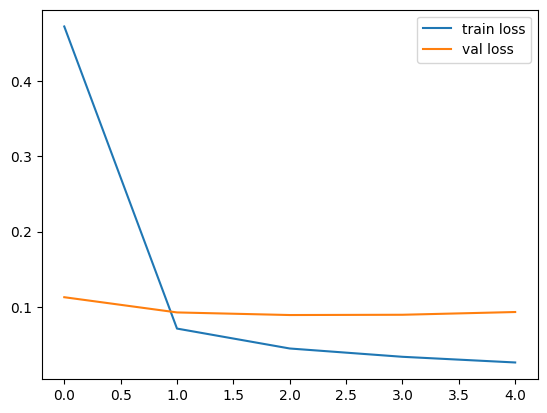

In [ ]:
# Ploting loss per iteration
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend();

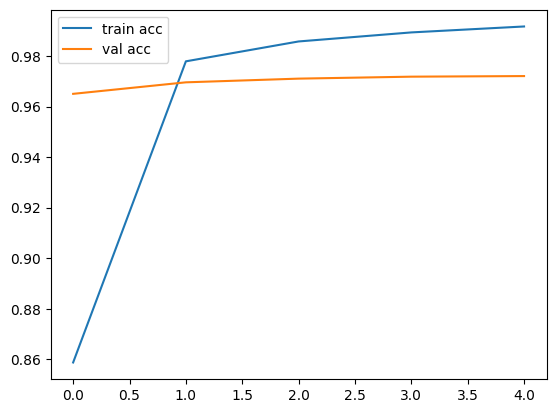

In [ ]:
# Ploting accuracy per iteration
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend();

In [ ]:
# True model accuracy - above includes padding
train_lengths = []
for sentence in train_inputs:
  train_lengths.append(len(sentence))

test_lengths = []
for sentence in test_inputs:
  test_lengths.append(len(sentence))

In [ ]:
train_probs = model.predict(train_inputs_int) # N x T x K

1255/1255 [==============================] - 104s 80ms/step


In [ ]:
train_predictions = []
for probs, length in zip(train_probs, train_lengths):
  probs_ = probs[-length:]
  preds = np.argmax(probs_, axis=1)
  train_predictions.append(preds)

flat_train_predictions = flatten(train_predictions)
flat_train_targets = flatten(train_targets_int_unpadded)

In [ ]:
test_probs = model.predict(test_inputs_int) # N x T x K

538/538 [==============================] - 43s 80ms/step


In [ ]:
test_predictions = []
for probs, length in zip(test_probs, test_lengths):
  probs_ = probs[-length:]
  preds = np.argmax(probs_, axis=1)
  test_predictions.append(preds)

flat_test_predictions = flatten(test_predictions)
flat_test_targets = flatten(test_targets_int_unpadded)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

print("Train acc:", accuracy_score(flat_train_targets, flat_train_predictions))
print("Test acc:", accuracy_score(flat_test_targets, flat_test_predictions))

print("Train f1:",
      f1_score(flat_train_targets, flat_train_predictions, average='macro'))
print("Test f1:",
      f1_score(flat_test_targets, flat_test_predictions, average='macro'))

Train acc: 0.9941088893356835
Test acc: 0.9721010388639547
Train f1: 0.9861774700999836
Test f1: 0.9309130974203191


In [ ]:
from collections import Counter

def most_common(lst):
  data = Counter(lst)
  return data.most_common(1)[0][0]

In [ ]:
token2tags = {k: [] for k, v in word2idx.items()}


del token2tags['UNK']

for tokens, tags in zip(train_inputs, train_targets):
  for token, tag in zip(tokens, tags):
    if should_lowercase:
      token = token.lower()
    if token in token2tags:
      token2tags[token].append(tag)

token2tag = {k: most_common(v) for k, v in token2tags.items()}

In [ ]:


train_predictions = []
for sentence in train_inputs:
  predictions = []
  for token in sentence:
    if should_lowercase:
      token = token.lower()
    predicted_tag = token2tag[token]
    predictions.append(predicted_tag)
  train_predictions.append(predictions)
flat_train_predictions = flatten(train_predictions)
flat_train_targets = flatten(train_targets)

In [ ]:
test_predictions = []
for sentence in test_inputs:
  predictions = []
  for token in sentence:
    predicted_tag = token2tag.get(token, 'INCORRECT')
    predictions.append(predicted_tag)
  test_predictions.append(predictions)
flat_test_predictions = flatten(test_predictions)
flat_test_targets = flatten(test_targets)

In [ ]:
print("Train acc:", accuracy_score(flat_train_targets, flat_train_predictions))
print("Test acc:", accuracy_score(flat_test_targets, flat_test_predictions))

print("Train f1:",
      f1_score(flat_train_targets, flat_train_predictions, average='macro'))
print("Test f1:",
      f1_score(flat_test_targets, flat_test_predictions, average='macro'))

Train acc: 0.9572906811658379
Test acc: 0.9273280282128173
Train f1: 0.9370988487873229
Test f1: 0.8257643576864147


In [ ]:
model.save('pos_tag_model.h5')